In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
df_data_1 = pd.read_csv(body)
df_data_1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_data_1.shape

(891, 12)

In [4]:
dataset=df_data_1
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
##Let's create funcition for barplot
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    #print(survived)
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    #print(dead)
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))
    
bar_chart('Sex')

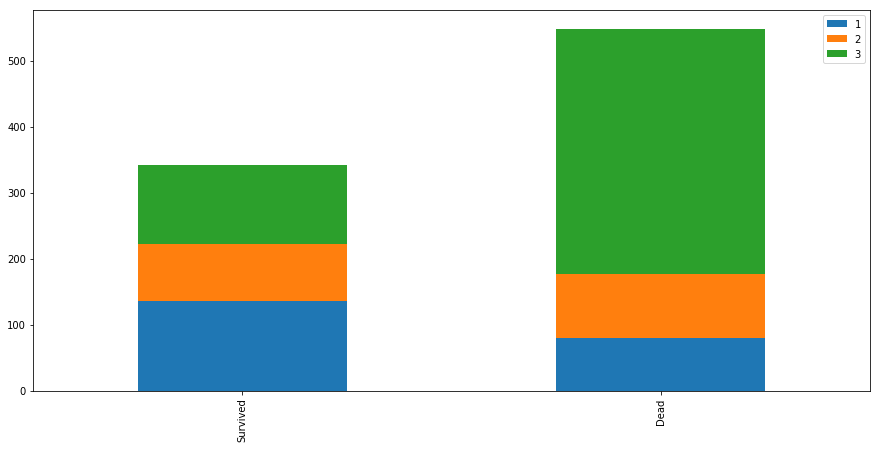

In [6]:
##Now let's see a barplot of Pclass
bar_chart('Pclass')

In [10]:
##Now let's make a list of our features matrix list
features= [ 'Pclass','Sex','Age']
x = dataset[features]
y= dataset['Survived']

In [11]:
###Now let's enocde categorical values 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [12]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [13]:
##Now fill the null values
x['Age'].fillna(x['Age'].mean(),inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [15]:
##Now everything is ok 
##Now let's Split the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =0)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0])

In [26]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.72685763, 0.27314237],
       [0.72685763, 0.27314237],
       [0.73834884, 0.26165116],
       [0.48569922, 0.51430078],
       [0.59453643, 0.40546357],
       [0.6319461 , 0.3680539 ],
       [0.47905183, 0.52094817],
       [0.4848594 , 0.5151406 ],
       [0.63476637, 0.36523363],
       [0.59410078, 0.40589922],
       [0.72875161, 0.27124839],
       [0.53375847, 0.46624153],
       [0.72685763, 0.27314237],
       [0.55491   , 0.44509   ],
       [0.48937932, 0.51062068],
       [0.60384669, 0.39615331],
       [0.73028157, 0.26971843],
       [0.6872531 , 0.3127469 ],
       [0.72412919, 0.27587081],
       [0.74162094, 0.25837906],
       [0.68780834, 0.31219166],
       [0.49067107, 0.50932893],
       [0.72685763, 0.27314237],
       [0.6319461 , 0.3680539 ],
       [0.59889012, 0.40110988],
       [0.47905183, 0.52094817],
       [0.7256754 , 0.2743246 ],
       [0.59889012, 0.40110988],
       [0.5433925 , 0.4566075 ],
       [0.61124143, 0.38875857],
       [0.

In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7111111111111111

In [29]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        51
           1       1.00      0.33      0.50        39

   micro avg       0.71      0.71      0.71        90
   macro avg       0.83      0.67      0.65        90
weighted avg       0.81      0.71      0.67        90



In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5813700477687626